In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf

In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [4]:
# Factors
path_dataset_3d='Tensor_decom_sample/data_6month/'

In [5]:
factor_2 = pd.read_csv(path_dataset_3d + "2.csv")

In [6]:
factor_2.shape

(4024, 202)

In [7]:
factor_2.set_index(factor_2.columns[-1], inplace=True)
factor_2.shape

(4024, 201)

In [8]:
factor_2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.000279,0.000281,0.000365,0.000132,-0.000545,-0.000584,0.000323,-0.000211,-0.000629,...,-0.000412,0.000256,-0.000243,-0.000487,-0.000267,-0.000442,-0.000007,-0.000091,-0.000422,-0.001714
2023-01-02 01:00:00,1,0.000296,0.000219,0.000548,0.000146,-0.000651,-0.000842,0.000201,-0.000285,-0.000605,...,0.001567,0.000715,0.000334,-0.000898,0.000891,-0.000808,0.001659,0.001100,-0.000401,-0.000735
2023-01-02 02:00:00,2,0.000138,0.000117,0.000211,0.000058,-0.000269,-0.000541,0.000201,-0.000075,-0.000330,...,0.002507,0.004319,0.000529,0.002342,-0.001447,-0.001389,-0.000431,0.001996,-0.000447,-0.000141
2023-01-02 03:00:00,3,0.000103,0.000113,0.000121,0.000053,-0.000234,-0.000284,-0.000019,-0.000062,-0.000183,...,0.000150,-0.000091,-0.000146,-0.000127,0.000440,0.000052,0.000120,-0.000231,-0.000504,-0.000225
2023-01-02 04:00:00,4,0.000237,0.000189,0.000892,0.000125,-0.001023,-0.001942,0.001188,-0.000138,-0.001224,...,-0.000319,-0.000170,-0.000112,-0.000333,0.000114,-0.000636,-0.000520,0.000654,-0.000708,0.000129


In [9]:
# Load features data

In [10]:
features_preproc = pd.read_csv(path_dataset_3d + 'final_features_preproc.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

In [11]:
features_preproc.head()

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Easter Monday,event_title_FA cup final,event_title_Good Friday,event_title_London Marathon,event_title_Spring bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_Winter Wonderland,event_title_nan
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.380665,0.133333,0.0,1.00,0.146226,0.688022,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-01-02 01:00:00,0.371601,0.100000,0.0,1.00,0.160377,0.646240,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-01-02 02:00:00,0.362538,0.033333,0.0,1.00,0.235849,0.621170,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-01-02 03:00:00,0.356495,0.000000,0.0,0.95,0.311321,0.610028,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2023-01-02 04:00:00,0.350453,0.000000,0.0,1.00,0.316038,0.607242,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
features_preproc.dtypes

temperature                                                        float64
rainfall                                                           float64
snowfall                                                           float64
cloudcover                                                         float64
wind_speed                                                         float64
wind_direction                                                     float64
daytime                                                              int64
London_zone_Central                                                float64
London_zone_South_East                                             float64
London_zone_East                                                   float64
London_zone_London_all                                             float64
London_zone_North                                                  float64
London_zone_South_West                                             float64
London_zone_West         

In [13]:
features_preproc["event_title_nan"].value_counts()

1.0    3576
0.0     480
Name: event_title_nan, dtype: int64

In [14]:
def change_2s(x):
    if x == 2:
        x = 1
    elif x == 1:
        x = 1
    else:
        x = 0
    return x

In [15]:
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(change_2s)

In [16]:
features_preproc["event_title_nan"].value_counts()

1    3576
0     480
Name: event_title_nan, dtype: int64

In [17]:
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

In [18]:
features_preproc.drop(columns="minute", inplace=True)

In [19]:
features_preproc.drop(columns="second", inplace=True)

In [20]:
features_preproc.drop(columns="London_zone_London_all", inplace=True)

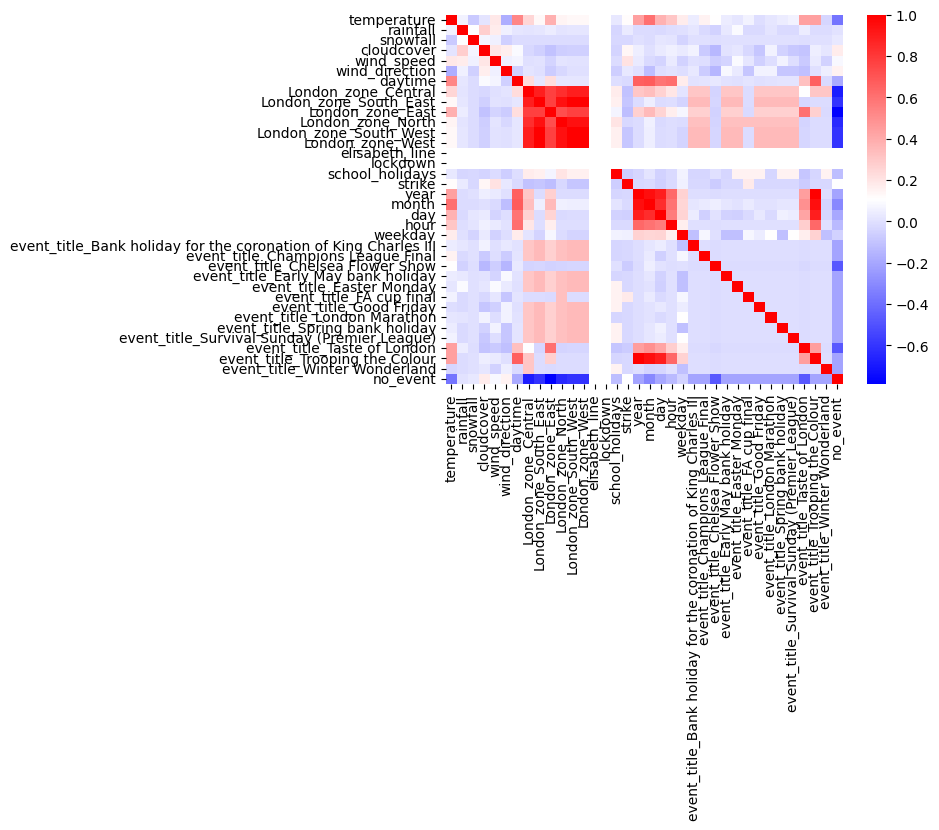

In [21]:
# Heatmap of pairwise correlations
correlation_matrix = features_preproc.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

In [22]:
features_preproc.shape

(4056, 36)

In [23]:
factor_2.shape

(4024, 201)

In [24]:
factor_2.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.000279,0.000281,0.000365,0.000132,-0.000545,-0.000584,0.000323,-0.000211,-0.000629,...,-0.000412,0.000256,-0.000243,-0.000487,-0.000267,-0.000442,-0.000007,-0.000091,-0.000422,-0.001714
2023-01-02 01:00:00,1,0.000296,0.000219,0.000548,0.000146,-0.000651,-0.000842,0.000201,-0.000285,-0.000605,...,0.001567,0.000715,0.000334,-0.000898,0.000891,-0.000808,0.001659,0.001100,-0.000401,-0.000735
2023-01-02 02:00:00,2,0.000138,0.000117,0.000211,0.000058,-0.000269,-0.000541,0.000201,-0.000075,-0.000330,...,0.002507,0.004319,0.000529,0.002342,-0.001447,-0.001389,-0.000431,0.001996,-0.000447,-0.000141
2023-01-02 03:00:00,3,0.000103,0.000113,0.000121,0.000053,-0.000234,-0.000284,-0.000019,-0.000062,-0.000183,...,0.000150,-0.000091,-0.000146,-0.000127,0.000440,0.000052,0.000120,-0.000231,-0.000504,-0.000225
2023-01-02 04:00:00,4,0.000237,0.000189,0.000892,0.000125,-0.001023,-0.001942,0.001188,-0.000138,-0.001224,...,-0.000319,-0.000170,-0.000112,-0.000333,0.000114,-0.000636,-0.000520,0.000654,-0.000708,0.000129


In [25]:
y = factor_2

In [26]:
y.shape

(4024, 201)

In [27]:
X = features_preproc

In [28]:
X.shape

(4056, 36)

In [29]:
X.columns

Index(['temperature', 'rainfall', 'snowfall', 'cloudcover', 'wind_speed',
       'wind_direction', 'daytime', 'London_zone_Central',
       'London_zone_South_East', 'London_zone_East', 'London_zone_North',
       'London_zone_South_West', 'London_zone_West', 'elisabeth_line',
       'lockdown', 'school_holidays', 'strike', 'year', 'month', 'day', 'hour',
       'weekday',
       'event_title_Bank holiday for the coronation of King Charles III',
       'event_title_Champions League Final', 'event_title_Chelsea Flower Show',
       'event_title_Early May bank holiday', 'event_title_Easter Monday',
       'event_title_FA cup final', 'event_title_Good Friday',
       'event_title_London Marathon', 'event_title_Spring bank holiday',
       'event_title_Survival Sunday (Premier League)',
       'event_title_Taste of London', 'event_title_Trooping the Colour',
       'event_title_Winter Wonderland', 'no_event'],
      dtype='object')

In [30]:
merged_df = y.join(features_preproc)

In [31]:
merged_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,event_title_Easter Monday,event_title_FA cup final,event_title_Good Friday,event_title_London Marathon,event_title_Spring bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_Winter Wonderland,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0,0.000279,0.000281,0.000365,0.000132,-0.000545,-0.000584,0.000323,-0.000211,-0.000629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 01:00:00,1,0.000296,0.000219,0.000548,0.000146,-0.000651,-0.000842,0.000201,-0.000285,-0.000605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 02:00:00,2,0.000138,0.000117,0.000211,0.000058,-0.000269,-0.000541,0.000201,-0.000075,-0.000330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 03:00:00,3,0.000103,0.000113,0.000121,0.000053,-0.000234,-0.000284,-0.000019,-0.000062,-0.000183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 04:00:00,4,0.000237,0.000189,0.000892,0.000125,-0.001023,-0.001942,0.001188,-0.000138,-0.001224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [32]:
merged_df.shape

(4024, 237)

In [33]:
merged_df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       'event_title_Easter Monday', 'event_title_FA cup final',
       'event_title_Good Friday', 'event_title_London Marathon',
       'event_title_Spring bank holiday',
       'event_title_Survival Sunday (Premier League)',
       'event_title_Taste of London', 'event_title_Trooping the Colour',
       'event_title_Winter Wonderland', 'no_event'],
      dtype='object', length=237)

In [34]:
merged_df.drop(columns="Unnamed: 0", inplace=True)

In [35]:
merged_df.shape

(4024, 236)

In [36]:
# Let's keep the last 40% of the values out for testing purposes
train_size = 0.6
index = round(train_size*merged_df.shape[0])

df_train = merged_df.iloc[:index]
df_test = merged_df.iloc[index:]

In [37]:
df_train.shape

(2414, 236)

In [38]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,event_title_Easter Monday,event_title_FA cup final,event_title_Good Friday,event_title_London Marathon,event_title_Spring bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_Winter Wonderland,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-02 00:00:00,0.000279,0.000281,0.000365,0.000132,-0.000545,-0.000584,0.000323,-0.000211,-0.000629,-0.000209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 01:00:00,0.000296,0.000219,0.000548,0.000146,-0.000651,-0.000842,0.000201,-0.000285,-0.000605,-0.000185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 02:00:00,0.000138,0.000117,0.000211,0.000058,-0.000269,-0.000541,0.000201,-0.000075,-0.000330,0.000067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 03:00:00,0.000103,0.000113,0.000121,0.000053,-0.000234,-0.000284,-0.000019,-0.000062,-0.000183,-0.000093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2023-01-02 04:00:00,0.000237,0.000189,0.000892,0.000125,-0.001023,-0.001942,0.001188,-0.000138,-0.001224,0.000615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [39]:
df_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       'event_title_Easter Monday', 'event_title_FA cup final',
       'event_title_Good Friday', 'event_title_London Marathon',
       'event_title_Spring bank holiday',
       'event_title_Survival Sunday (Premier League)',
       'event_title_Taste of London', 'event_title_Trooping the Colour',
       'event_title_Winter Wonderland', 'no_event'],
      dtype='object', length=236)

In [40]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
X_train =  df_train.iloc[:,200:]
X_train = np.asarray(X_train).astype("float32")
X_test = df_test.iloc[:,200:]
X_test = np.asarray(X_test).astype("float32")
y_train = df_train.iloc[:,0:200]
y_train = np.asarray(y_train).astype("float32")
y_test =  df_test.iloc[:,0:200]
y_test = np.asarray(y_test).astype("float32")

In [42]:
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [43]:
# 0- Imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Dropout
from matplotlib import pyplot

In [44]:
X_train.shape, y_train.shape

((2414, 36), (2414, 200))

In [45]:
# X_train = tf.expand_dims(X_train, -1)
# X_test = tf.expand_dims(X_test, -1)

In [46]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [47]:
X_train.shape , X_test.shape

((2414, 1, 36), (1610, 1, 36))

In [48]:
# 1- RNN Architecture
model = Sequential()
model.add(layers.LSTM(units=500, activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(layers.Dense(400))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(300))
model.add(layers.Dense(250))
model.add(layers.Dense(200, activation="linear"))

In [49]:
# 2- Compilation
model.compile(loss='mae',
              optimizer=Adam(learning_rate=0.01),metrics=['accuracy']) # very high lr so we can converge with such a small dataset

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

# 3- Fit
history = model.fit(X_train, y_train, epochs=50,validation_split = 0.25,verbose=1, callbacks=[es])


Epoch 1/50
57/57 [==============================] - 5s 46ms/step - loss: 1.1924 - accuracy: 0.0077 - val_loss: 0.0596 - val_accuracy: 0.0199
Epoch 2/50
57/57 [==============================] - 2s 38ms/step - loss: 0.0390 - accuracy: 0.0039 - val_loss: 0.0232 - val_accuracy: 0.0033
Epoch 3/50
57/57 [==============================] - 3s 49ms/step - loss: 0.0214 - accuracy: 0.0099 - val_loss: 0.0216 - val_accuracy: 0.0017
Epoch 4/50
57/57 [==============================] - 3s 44ms/step - loss: 0.0189 - accuracy: 0.0066 - val_loss: 0.0185 - val_accuracy: 0.0050
Epoch 5/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0167 - accuracy: 0.0039 - val_loss: 0.0149 - val_accuracy: 0.0066
Epoch 6/50
57/57 [==============================] - 2s 32ms/step - loss: 0.0150 - accuracy: 0.0039 - val_loss: 0.0155 - val_accuracy: 0.0083
Epoch 7/50
57/57 [==============================] - 2s 33ms/step - loss: 0.0138 - accuracy: 0.0044 - val_loss: 0.0138 - val_accuracy: 0.0017
Epoch 8/50
57

In [51]:
# 4- Predict
model.evaluate(X_test,y_test)

51/51 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.0037


[0.011848237365484238, 0.0037267080042511225]

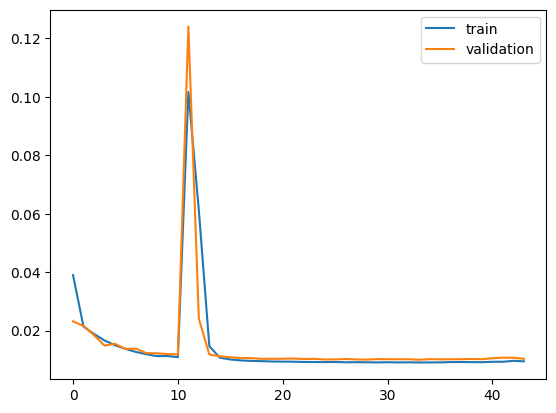

In [57]:
# plot history
pyplot.plot(history.history['loss'][1:], label='train')
pyplot.plot(history.history['val_loss'][1:], label='validation')
pyplot.legend()
pyplot.show()

In [54]:
y_pred = model.predict(X_test)

51/51 [==============================] - 1s 16ms/step


In [55]:
y_pred

array([[ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ],
       [ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ],
       [ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ],
       ...,
       [ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ],
       [ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ],
       [ 0.00526692,  0.00313445,  0.00170465, ..., -0.00662811,
        -0.00396991, -0.0022635 ]], dtype=float32)

In [56]:
len(y_pred)

1610